In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
IMG_SIZE=224
BATCH_SIZE=32

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [7]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/My Internship/Sri Gayathri/alzheimer dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 3200 images belonging to 4 classes.


In [8]:
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/My Internship/Sri Gayathri/alzheimer dataset/train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 800 images belonging to 4 classes.


In [13]:
class_indices=train_generator.class_indices
#extra class names
class_names=list(class_indices.keys())
print("class indies:",class_indices)
print("class names:",class_names)

class indies: {'Mild Demanted': 0, 'Moderate Demanted': 1, 'Non Demented': 2, 'VeyMild Demented': 3}
class names: ['Mild Demanted', 'Moderate Demanted', 'Non Demented', 'VeyMild Demented']


In [14]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(4,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3138 - loss: 1.6321

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 866s 9s/step - accuracy: 0.3144 - loss: 1.6294 - val_accuracy: 0.5238 - val_loss: 1.0840
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.5737 - loss: 0.9843 - val_accuracy: 0.5987 - val_loss: 0.8738
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 350s 4s/step - accuracy: 0.7036 - loss: 0.7065 - val_accuracy: 0.6587 - val_loss: 0.8060
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.7934 - loss: 0.5175 - val_accuracy: 0.6525 - val_loss: 0.7991
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.8543 - loss: 0.3612 - val_accuracy: 0.6550 - val_loss: 0.8607


In [21]:
model.save('/content/drive/MyDrive/My Internship/Sri Gayathri/alzheimer dataset/alzheimer.h5')

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualization
import numpy as np
model=load_model('/content/drive/MyDrive/My Internship/Sri Gayathri/alzheimer dataset/alzheimer.h5')
print("Model Loaded")

Model Loaded


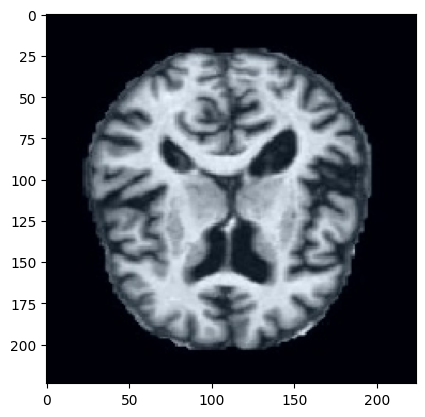

In [23]:
test_image_path="/content/drive/MyDrive/My Internship/Sri Gayathri/alzheimer dataset/train/Mild Demanted/001f15e8-6ad4-4e7a-bc36-b62b984dad69.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [24]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255

In [25]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Mild Demanted
